In [1]:
import argparse
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

import torch
import numpy as np 

from preprocess import get_mnist, get_webcam
from train import TrainerVaDE

In [2]:
class Args:
    batch_size = 128
    lr = 1e-4
    dataset = 'mnist'
    pretrain = True
    epochs = 200
    n_shots = 10
    sup_mul = 0.9
    cl_mul = 10


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    
args = Args() # Parsing all the arguments for the training
if args.dataset == 'mnist':
    dataloader_sup, dataloader_unsup, dataloader_test = get_mnist(args)
    n_classes = 10
else:
    dataloader_sup, dataloader_unsup, dataloader_test = get_webcam(args)
    n_classes = 31

In [3]:
vade = TrainerVaDE(args, device, dataloader_sup, dataloader_unsup, dataloader_test, n_classes)

In [14]:
if args.dataset == 'webcam':
    classes = ['back_pack',
                'bike',
                'bike_helmet',
                'bookcase',
                'bottle',
                'calculator',
                'desk_chair',
                'desk_lamp',
                'desktop_computer',
                'file_cabinet',
                'headphones',
                'keyboard',
                'laptop_computer',
                'letter_tray',
                'mobile_phone',
                'monitor',
                'mouse',
                'mug',
                'paper_notebook',
                'pen',
                'phone',
                'printer',
                'projector',
                'punchers',
                'ring_binder',
                'ruler',
                'scissors',
                'speaker',
                'stapler',
                'tape_dispenser',
                'trash_can']
else:
    classes = ['0',
               '1',
               '2',
               '3',
               '4',
               '5',
               '6',
               '7',
               '8',
               '9']


def get_latent_space(dataloader, z_dim, model, device, ftr_ext=None):
    z = torch.zeros((1, z_dim)).float().to(device)
    y = torch.zeros((1)).long().to(device)
    with torch.no_grad():
        for img, label in dataloader:
            img, label = img.to(device).float(), label.to(device).long()
            if ftr_ext is not None:
                img = ftr_ext(img); img = img.detach()

            mu, log_var = model.encode(img)
            z_l = model.reparameterize(mu, log_var)
            y = torch.cat((y, label), dim=0)
            z = torch.cat((z, z_l), dim=0)
    return z[1:], y[1:]


def plot_tsne(X_embedded, y, ticks, dataset):
    f, ax1 = plt.subplots(1, 1, sharey=True, figsize=(15,10))

    cmap = plt.get_cmap('jet', 10)


    cax = ax1.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y.numpy(),
                      s=15, cmap=cmap)

    cbar = f.colorbar(cax, ticks=np.linspace(0,30,31))
    cbar.ax.set_yticklabels(ticks)

    ax1.xaxis.set_visible(False)
    ax1.yaxis.set_visible(False)
    plt.savefig('weights/vade_tsne_{}_ss.png'.format(dataset))
    plt.show()

In [5]:
vade.train()

Training VaDE...


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Testing VaDE... Epoch: -1, Loss: 8.970818410945844, Acc: 42.24683544303797
Training VaDE... Epoch: 0, Loss: 35.7788367240922, Acc: 97.0
Testing VaDE... Epoch: 0, Loss: 10.17142300666133, Acc: 72.86392405063292
Training VaDE... Epoch: 1, Loss: 30.235303073549577, Acc: 98.0
Testing VaDE... Epoch: 1, Loss: 13.479870252971407, Acc: 70.17405063291139
Training VaDE... Epoch: 2, Loss: 28.24854437577953, Acc: 100.0
Testing VaDE... Epoch: 2, Loss: 16.656320571899414, Acc: 71.07397151898734
Training VaDE... Epoch: 3, Loss: 27.10357422005139, Acc: 99.0
Testing VaDE... Epoch: 3, Loss: 18.25557615787168, Acc: 72.91337025316456
Training VaDE... Epoch: 4, Loss: 26.47879346753997, Acc: 99.0
Testing VaDE... Epoch: 4, Loss: 18.814042924325676, Acc: 74.78243670886076
Training VaDE... Epoch: 5, Loss: 26.09419749489725, Acc: 99.0
Testing VaDE... Epoch: 5, Loss: 19.009339006641245, Acc: 75.98892405063292
Training VaDE... Epoch: 6, Loss: 25.86837897473561, Acc: 100.0
Testing VaDE... Epoch: 6, Loss: 19.169511

Testing VaDE... Epoch: 58, Loss: 19.094936950297296, Acc: 83.26740506329114
Training VaDE... Epoch: 59, Loss: 24.39826139356536, Acc: 99.0
Testing VaDE... Epoch: 59, Loss: 19.23265423352205, Acc: 83.37618670886076
Training VaDE... Epoch: 60, Loss: 24.38517433036365, Acc: 100.0
Testing VaDE... Epoch: 60, Loss: 19.16537369353862, Acc: 83.23773734177215
Training VaDE... Epoch: 61, Loss: 24.386809900117072, Acc: 99.0
Testing VaDE... Epoch: 61, Loss: 19.185736813122713, Acc: 83.63330696202532
Training VaDE... Epoch: 62, Loss: 24.374025690530154, Acc: 100.0
Testing VaDE... Epoch: 62, Loss: 19.279079751123355, Acc: 83.22784810126582
Training VaDE... Epoch: 63, Loss: 24.374750706686903, Acc: 100.0
Testing VaDE... Epoch: 63, Loss: 19.18012952200974, Acc: 83.56408227848101
Training VaDE... Epoch: 64, Loss: 24.367018746414672, Acc: 100.0
Testing VaDE... Epoch: 64, Loss: 19.236769084688984, Acc: 83.64319620253164
Training VaDE... Epoch: 65, Loss: 24.36540151811612, Acc: 100.0
Testing VaDE... Epoch

Training VaDE... Epoch: 117, Loss: 24.22001104212519, Acc: 100.0
Testing VaDE... Epoch: 117, Loss: 18.975521811956092, Acc: 84.57278481012658
Training VaDE... Epoch: 118, Loss: 24.21235832019147, Acc: 100.0
Testing VaDE... Epoch: 118, Loss: 19.138267058360427, Acc: 84.38488924050633
Training VaDE... Epoch: 119, Loss: 24.21435880762682, Acc: 100.0
Testing VaDE... Epoch: 119, Loss: 18.82451252997676, Acc: 84.72112341772151
Training VaDE... Epoch: 120, Loss: 24.21202062594611, Acc: 99.0
Testing VaDE... Epoch: 120, Loss: 18.956381954724275, Acc: 84.64200949367088
Training VaDE... Epoch: 121, Loss: 24.21036867495539, Acc: 100.0
Testing VaDE... Epoch: 121, Loss: 19.11847940275941, Acc: 84.52333860759494
Training VaDE... Epoch: 122, Loss: 24.21247443664811, Acc: 100.0
Testing VaDE... Epoch: 122, Loss: 19.00191961360883, Acc: 84.48378164556962
Training VaDE... Epoch: 123, Loss: 24.205470729738412, Acc: 100.0
Testing VaDE... Epoch: 123, Loss: 19.102935911733894, Acc: 84.62223101265823
Training 

Training VaDE... Epoch: 175, Loss: 24.148081143019297, Acc: 100.0
Testing VaDE... Epoch: 175, Loss: 18.945439145534852, Acc: 85.30458860759494
Training VaDE... Epoch: 176, Loss: 24.14280326940866, Acc: 100.0
Testing VaDE... Epoch: 176, Loss: 18.90838965886756, Acc: 85.0870253164557
Training VaDE... Epoch: 177, Loss: 24.14234135349168, Acc: 100.0
Testing VaDE... Epoch: 177, Loss: 18.90362374993819, Acc: 85.00791139240506
Training VaDE... Epoch: 178, Loss: 24.14000050396299, Acc: 100.0
Testing VaDE... Epoch: 178, Loss: 18.906513117536715, Acc: 85.19580696202532
Training VaDE... Epoch: 179, Loss: 24.14632626840555, Acc: 100.0
Testing VaDE... Epoch: 179, Loss: 19.048438687867755, Acc: 85.24525316455696
Training VaDE... Epoch: 180, Loss: 24.141970229809726, Acc: 100.0
Testing VaDE... Epoch: 180, Loss: 19.058110176762447, Acc: 85.02768987341773
Training VaDE... Epoch: 181, Loss: 24.141504108778705, Acc: 100.0
Testing VaDE... Epoch: 181, Loss: 18.986803006522262, Acc: 85.12658227848101
Traini

In [6]:
z_dim = 10
model = vade.VaDE
z, y = get_latent_space(dataloader_test, z_dim, model, device)
z, y = z.cpu(), y.cpu()
z_embedded = TSNE(n_components=2).fit_transform(z.detach().numpy())


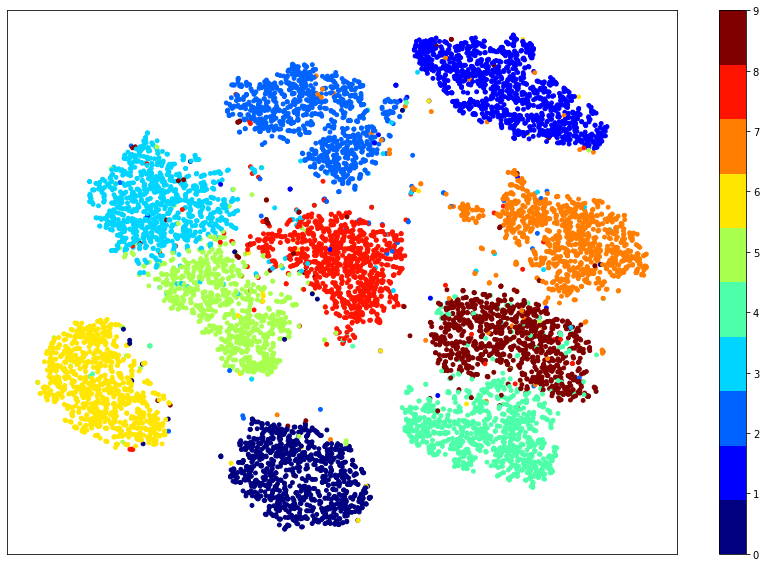

In [15]:
plot_tsne(z_embedded, y, classes, args.dataset)

In [8]:
acc = np.array(vade.acc)
acc_t = np.array(vade.acc_t)
rec = np.array(vade.rec)
rec_t = np.array(vade.rec_t)
dkl = np.array(vade.dkl)
dkl_t = np.array(vade.dkl_t)

def plot_loss(values, values_t, metric, dataset):
    plt.plot(np.arange(len(values)), values, c='k', label='train')
    plt.plot(np.arange(len(values_t)), values_t, c='b', label='test')
    plt.title('VaDE {}'.format(metric))
    plt.ylabel(metric)
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.grid(True)
    plt.savefig('weights/vade_{}_{}_ss'.format(metric, dataset))

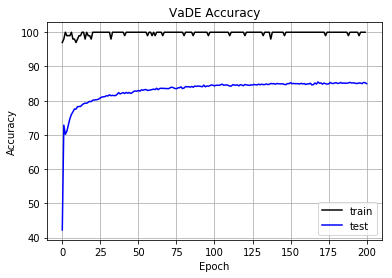

In [9]:
plot_loss(acc, acc_t, 'Accuracy', args.dataset)

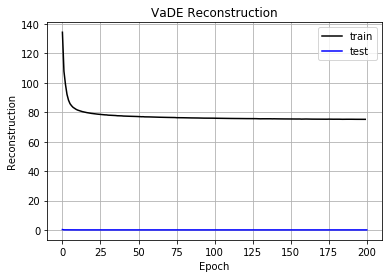

In [23]:
plot_loss(rec, rec_t, 'Reconstruction', args.dataset)

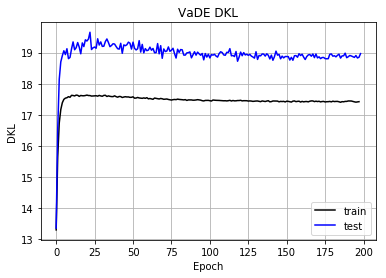

In [24]:
plot_loss(dkl[2:], dkl_t[2:], 'DKL', args.dataset)